League of Legends é um jogo de computador onde duas equipes de 5 jogadores se enfrentam em um mapa com o objetivo de destruir o Nexus inimigo.

Cada jogador escolhe um personagem (chamado de 'Campeão') para jogar, bane um Campeão e se equipe com 2 feitiços de invocador.
Durante a partida, cada equipe pode destruir torres para avançar no mapa, destruir inibidores para fortalecer suas tropas, derrotas o Arauto do Vale, Dragões ou o Barão Nashor't para ganhar vantagens na partida.

Sabendo disso, quais os principais **Objetivos** que uma equipe deve se  para alcançar a vitória?

Com base nesta pergunta, foi realizada esta análise, comparando o foco das equipes nos objetivos com o resultado.


# Configuração do Ambiente

In [46]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from tqdm.notebook import tqdm_notebook as tqdm

# Apresentação dos dados

### Jogos

Dados de mais de 50000 partidas do jogo, contendo várias informações importantes, como vencedero, torres destruídas, dragões derrotados e total de vezes que derrotaram o Barão Nashor't.

In [3]:
games = pd.read_csv('games.csv')

In [4]:
games

,gameId,creationTime,gameDuration,seasonId,winner,firstBlood,firstTower,firstInhibitor,firstBaron,firstDragon,...,t2_towerKills,t2_inhibitorKills,t2_baronKills,t2_dragonKills,t2_riftHeraldKills,t2_ban1,t2_ban2,t2_ban3,t2_ban4,t2_ban5
0,3326086514,1504279457970,1949,9,1,2,1,1,1,1,...,5,0,0,1,1,114,67,43,16,51
1,3229566029,1497848803862,1851,9,1,1,1,1,0,1,...,2,0,0,0,0,11,67,238,51,420
2,3327363504,1504360103310,1493,9,1,2,1,1,1,2,...,2,0,0,1,0,157,238,121,57,28
3,3326856598,1504348503996,1758,9,1,1,1,1,1,1,...,0,0,0,0,0,164,18,141,40,51
4,3330080762,1504554410899,2094,9,1,2,1,1,1,1,...,3,0,0,1,0,86,11,201,122,18
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51485,3308904636,1503076540231,1944,9,2,1,2,2,0,2,...,10,2,0,4,0,55,-1,90,238,157
51486,3215685759,1496957179355,3304,9,2,1,1,2,2,2,...,11,7,4,4,1,157,55,119,154,105
51487,3322765040,1504029863961,2156,9,2,2,2,2,0,1,...,10,2,0,2,0,113,122,53,11,157
51488,3256675373,1499562036246,1475,9,2,2,2,2,0,2,...,11,3,0,1,0,154,39,51,90,114


In [5]:
#Verificando tamanho do dataset
lin, col = games.shape
print(f'Linhas: {lin}')
print(f'Colunas: {col}')

Linhas: 51490
Colunas: 61


In [6]:
#Verificando a presença de dados nulos
games.isna().sum()

gameId          0
creationTime    0
gameDuration    0
seasonId        0
winner          0
               ..
t2_ban1         0
t2_ban2         0
t2_ban3         0
t2_ban4         0
t2_ban5         0
Length: 61, dtype: int64

### Campeões

Tabela com o nome dos Campeões, pois na tabela 'games' há apenas os ids

In [7]:
champs = pd.read_json('champion_info.json')
champs

,type,version,data
1,champion,7.17.2,"{'title': 'the Dark Child', 'id': 1, 'key': 'A..."
10,champion,7.17.2,"{'title': 'The Judicator', 'id': 10, 'key': 'K..."
101,champion,7.17.2,"{'title': 'the Magus Ascendant', 'id': 101, 'k..."
102,champion,7.17.2,"{'title': 'the Half-Dragon', 'id': 102, 'key':..."
103,champion,7.17.2,"{'title': 'the Nine-Tailed Fox', 'id': 103, 'k..."
...,...,...,...
91,champion,7.17.2,"{'title': 'the Blade's Shadow', 'id': 91, 'key..."
92,champion,7.17.2,"{'title': 'the Exile', 'id': 92, 'key': 'Riven..."
96,champion,7.17.2,"{'title': 'the Mouth of the Abyss', 'id': 96, ..."
98,champion,7.17.2,"{'title': 'the Eye of Twilight', 'id': 98, 'ke..."


In [8]:
#Verificando tamanho do dataset
lin, col = champs.shape
print(f'Linhas: {lin}')
print(f'Colunas: {col}')

Linhas: 138
Colunas: 3


In [9]:
#Verificando a presença de dados nulos
games.isna().sum()

gameId          0
creationTime    0
gameDuration    0
seasonId        0
winner          0
               ..
t2_ban1         0
t2_ban2         0
t2_ban3         0
t2_ban4         0
t2_ban5         0
Length: 61, dtype: int64

In [10]:
# Extração dos dados dos dicionários da tabela
champs_list = champs['data'].to_list()
champs_list[:10]

[{'title': 'the Dark Child', 'id': 1, 'key': 'Annie', 'name': 'Annie'},
 {'title': 'The Judicator', 'id': 10, 'key': 'Kayle', 'name': 'Kayle'},
 {'title': 'the Magus Ascendant',
  'id': 101,
  'key': 'Xerath',
  'name': 'Xerath'},
 {'title': 'the Half-Dragon', 'id': 102, 'key': 'Shyvana', 'name': 'Shyvana'},
 {'title': 'the Nine-Tailed Fox', 'id': 103, 'key': 'Ahri', 'name': 'Ahri'},
 {'title': 'the Outlaw', 'id': 104, 'key': 'Graves', 'name': 'Graves'},
 {'title': 'the Tidal Trickster', 'id': 105, 'key': 'Fizz', 'name': 'Fizz'},
 {'title': "the Thunder's Roar",
  'id': 106,
  'key': 'Volibear',
  'name': 'Volibear'},
 {'title': 'the Pridestalker', 'id': 107, 'key': 'Rengar', 'name': 'Rengar'},
 {'title': 'the Wuju Bladesman',
  'id': 11,
  'key': 'MasterYi',
  'name': 'Master Yi'}]

In [11]:
champs = pd.DataFrame(champs_list)
champs

,title,id,key,name
0,the Dark Child,1,Annie,Annie
1,The Judicator,10,Kayle,Kayle
2,the Magus Ascendant,101,Xerath,Xerath
3,the Half-Dragon,102,Shyvana,Shyvana
4,the Nine-Tailed Fox,103,Ahri,Ahri
...,...,...,...,...
133,the Blade's Shadow,91,Talon,Talon
134,the Exile,92,Riven,Riven
135,the Mouth of the Abyss,96,KogMaw,Kog'Maw
136,the Eye of Twilight,98,Shen,Shen


In [12]:
champs['name'][champs['id']==10].to_list()[0]

'Kayle'

### Summoner speels (Feitiços de invocador)

Tabela com o nome dos feitiços de invocador, pois na tabela 'games' há apenas os ids.

In [13]:
sum_spels = pd.read_json('summoner_spell_info.json')
sum_spels

,type,version,data
1,summoner,7.17.2,"{'id': 1, 'summonerLevel': 6, 'name': 'Cleanse..."
11,summoner,7.17.2,"{'id': 11, 'summonerLevel': 10, 'name': 'Smite..."
12,summoner,7.17.2,"{'id': 12, 'summonerLevel': 6, 'name': 'Telepo..."
13,summoner,7.17.2,"{'id': 13, 'summonerLevel': 1, 'name': 'Clarit..."
14,summoner,7.17.2,"{'id': 14, 'summonerLevel': 10, 'name': 'Ignit..."
21,summoner,7.17.2,"{'id': 21, 'summonerLevel': 4, 'name': 'Barrie..."
3,summoner,7.17.2,"{'id': 3, 'summonerLevel': 4, 'name': 'Exhaust..."
30,summoner,7.17.2,"{'id': 30, 'summonerLevel': 1, 'name': 'To the..."
31,summoner,7.17.2,"{'id': 31, 'summonerLevel': 1, 'name': 'Poro T..."
32,summoner,7.17.2,"{'id': 32, 'summonerLevel': 1, 'name': 'Mark',..."


In [14]:
#Verificando tamanho do dataset
lin, col = sum_spels.shape
print(f'Linhas: {lin}')
print(f'Colunas: {col}')

Linhas: 17
Colunas: 3


In [15]:
#Verificando a presença de dados nulos
games.isna().sum()

gameId          0
creationTime    0
gameDuration    0
seasonId        0
winner          0
               ..
t2_ban1         0
t2_ban2         0
t2_ban3         0
t2_ban4         0
t2_ban5         0
Length: 61, dtype: int64

Os dados dos feitiços de invocador estão todos em dicionários na coluna 'data'

In [16]:
# Extração dos dados dos dicionários da tabela
sum_spels_list = sum_spels['data'].to_list()
sum_spels_list[:5]

[{'id': 1,
  'summonerLevel': 6,
  'name': 'Cleanse',
  'key': 'SummonerBoost',
  'description': 'Removes all disables (excluding suppression and airborne) and summoner spell debuffs affecting your champion and lowers the duration of incoming disables by 65% for 3 seconds.'},
 {'id': 11,
  'summonerLevel': 10,
  'name': 'Smite',
  'key': 'SummonerSmite',
  'description': 'Deals 390-1000 true damage (depending on champion level) to target epic, large, or medium monster or enemy minion. Restores Health based on your maximum life when used against monsters.'},
 {'id': 12,
  'summonerLevel': 6,
  'name': 'Teleport',
  'key': 'SummonerTeleport',
  'description': 'After channeling for 4.5 seconds, teleports your champion to target allied structure, minion, or ward.'},
 {'id': 13,
  'summonerLevel': 1,
  'name': 'Clarity',
  'key': 'SummonerMana',
  'description': "Restores 50% of your champion's maximum Mana. Also restores allies for 25% of their maximum Mana."},
 {'id': 14,
  'summonerLevel

In [17]:
sum_spels = pd.DataFrame(sum_spels_list)

### Junção dos dados das tabelas

In [18]:
# Troca o id pelo nome dos campeões
colunas = ['t1_champ1id', 't1_champ2id', 't1_champ3id', 't1_champ4id', 't1_champ5id',
           't2_champ1id', 't2_champ2id', 't2_champ3id', 't2_champ4id', 't2_champ5id']
for coluna in tqdm(colunas):
  games[coluna] = games[coluna].apply(lambda x: champs['name'][champs['id']==x].to_list()[0] )

  0%|          | 0/10 [00:00<?, ?it/s]

In [19]:
# Troca o id pelo nome do feitiço de invocador
colunas = ['t1_champ1_sum1', 't1_champ1_sum2', 't1_champ2_sum1', 't1_champ2_sum2', 't1_champ3_sum1', 't1_champ3_sum2',
           't1_champ4_sum1', 't1_champ4_sum2', 't1_champ5_sum1', 't1_champ5_sum2',
           't2_champ1_sum1', 't2_champ1_sum2', 't2_champ2_sum1', 't2_champ2_sum2', 't2_champ3_sum1', 't2_champ3_sum2',
           't2_champ4_sum1', 't2_champ4_sum2', 't2_champ5_sum1', 't2_champ5_sum2']
for coluna in tqdm(colunas):
  games[coluna] = games[coluna].apply(lambda x: sum_spels['name'][sum_spels['id']==x].to_list()[0] )

  0%|          | 0/20 [00:00<?, ?it/s]

In [20]:
games

,gameId,creationTime,gameDuration,seasonId,winner,firstBlood,firstTower,firstInhibitor,firstBaron,firstDragon,...,t2_towerKills,t2_inhibitorKills,t2_baronKills,t2_dragonKills,t2_riftHeraldKills,t2_ban1,t2_ban2,t2_ban3,t2_ban4,t2_ban5
0,3326086514,1504279457970,1949,9,1,2,1,1,1,1,...,5,0,0,1,1,114,67,43,16,51
1,3229566029,1497848803862,1851,9,1,1,1,1,0,1,...,2,0,0,0,0,11,67,238,51,420
2,3327363504,1504360103310,1493,9,1,2,1,1,1,2,...,2,0,0,1,0,157,238,121,57,28
3,3326856598,1504348503996,1758,9,1,1,1,1,1,1,...,0,0,0,0,0,164,18,141,40,51
4,3330080762,1504554410899,2094,9,1,2,1,1,1,1,...,3,0,0,1,0,86,11,201,122,18
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51485,3308904636,1503076540231,1944,9,2,1,2,2,0,2,...,10,2,0,4,0,55,-1,90,238,157
51486,3215685759,1496957179355,3304,9,2,1,1,2,2,2,...,11,7,4,4,1,157,55,119,154,105
51487,3322765040,1504029863961,2156,9,2,2,2,2,0,1,...,10,2,0,2,0,113,122,53,11,157
51488,3256675373,1499562036246,1475,9,2,2,2,2,0,2,...,11,3,0,1,0,154,39,51,90,114


In [93]:
# Colunas da tabela
games.columns

Index(['gameId', 'creationTime', 'gameDuration', 'seasonId', 'winner',
       'firstBlood', 'firstTower', 'firstInhibitor', 'firstBaron',
       'firstDragon', 'firstRiftHerald', 't1_champ1id', 't1_champ1_sum1',
       't1_champ1_sum2', 't1_champ2id', 't1_champ2_sum1', 't1_champ2_sum2',
       't1_champ3id', 't1_champ3_sum1', 't1_champ3_sum2', 't1_champ4id',
       't1_champ4_sum1', 't1_champ4_sum2', 't1_champ5id', 't1_champ5_sum1',
       't1_champ5_sum2', 't1_towerKills', 't1_inhibitorKills', 't1_baronKills',
       't1_dragonKills', 't1_riftHeraldKills', 't1_ban1', 't1_ban2', 't1_ban3',
       't1_ban4', 't1_ban5', 't2_champ1id', 't2_champ1_sum1', 't2_champ1_sum2',
       't2_champ2id', 't2_champ2_sum1', 't2_champ2_sum2', 't2_champ3id',
       't2_champ3_sum1', 't2_champ3_sum2', 't2_champ4id', 't2_champ4_sum1',
       't2_champ4_sum2', 't2_champ5id', 't2_champ5_sum1', 't2_champ5_sum2',
       't2_towerKills', 't2_inhibitorKills', 't2_baronKills', 't2_dragonKills',
       't2_riftHer

# Análise dos Fatores Influenciadores de Vitória

## Lado do Mapa

O time 1 está na parte de baixo do mapa, enquanto o time 2, está na parte de cima, por isso, o lado pode influenciar.

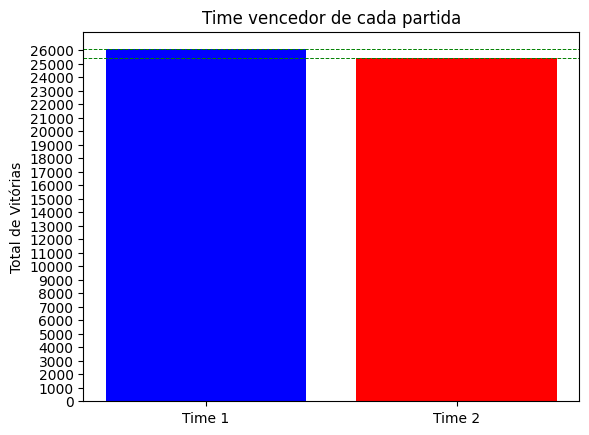

In [21]:
labels = ['Time 1', 'Time 2']
colors = ['blue', 'red']

resultados = games['winner'].value_counts()
contagem = [resultados[1], resultados[2]]

fig, ax = plt.subplots()

ax.bar(labels, contagem, color=colors)

ax.set_yticks(range(0, max(contagem), 1000))

for topo in contagem:
    ax.axhline(topo, color='green', linestyle='--', linewidth=0.7)

ax.set_title('Time vencedor de cada partida')
ax.set_ylabel('Total de Vitórias')

plt.show()

## Primeiros a Realizar Objetivo

In [22]:
def compara_vitorias(ax, df: pd.DataFrame, column: str, title: str) -> None:
  contagem = np.where(df['winner'] == df[column], 'Vitórias', 'Derrotas')
  contagem = pd.Series(contagem).value_counts()

  labels = ['Vitórias', 'Derrotas']
  colors = ['green', 'red']

  ax.bar(labels, contagem, color=colors)

  ax.set_yticks(range(0, max(contagem), 2000))

  for topo in contagem:
      ax.axhline(topo, color='black', linestyle='--', linewidth=0.7)

  ax.set_title(title)
  ax.set_ylabel('Total de partidas')

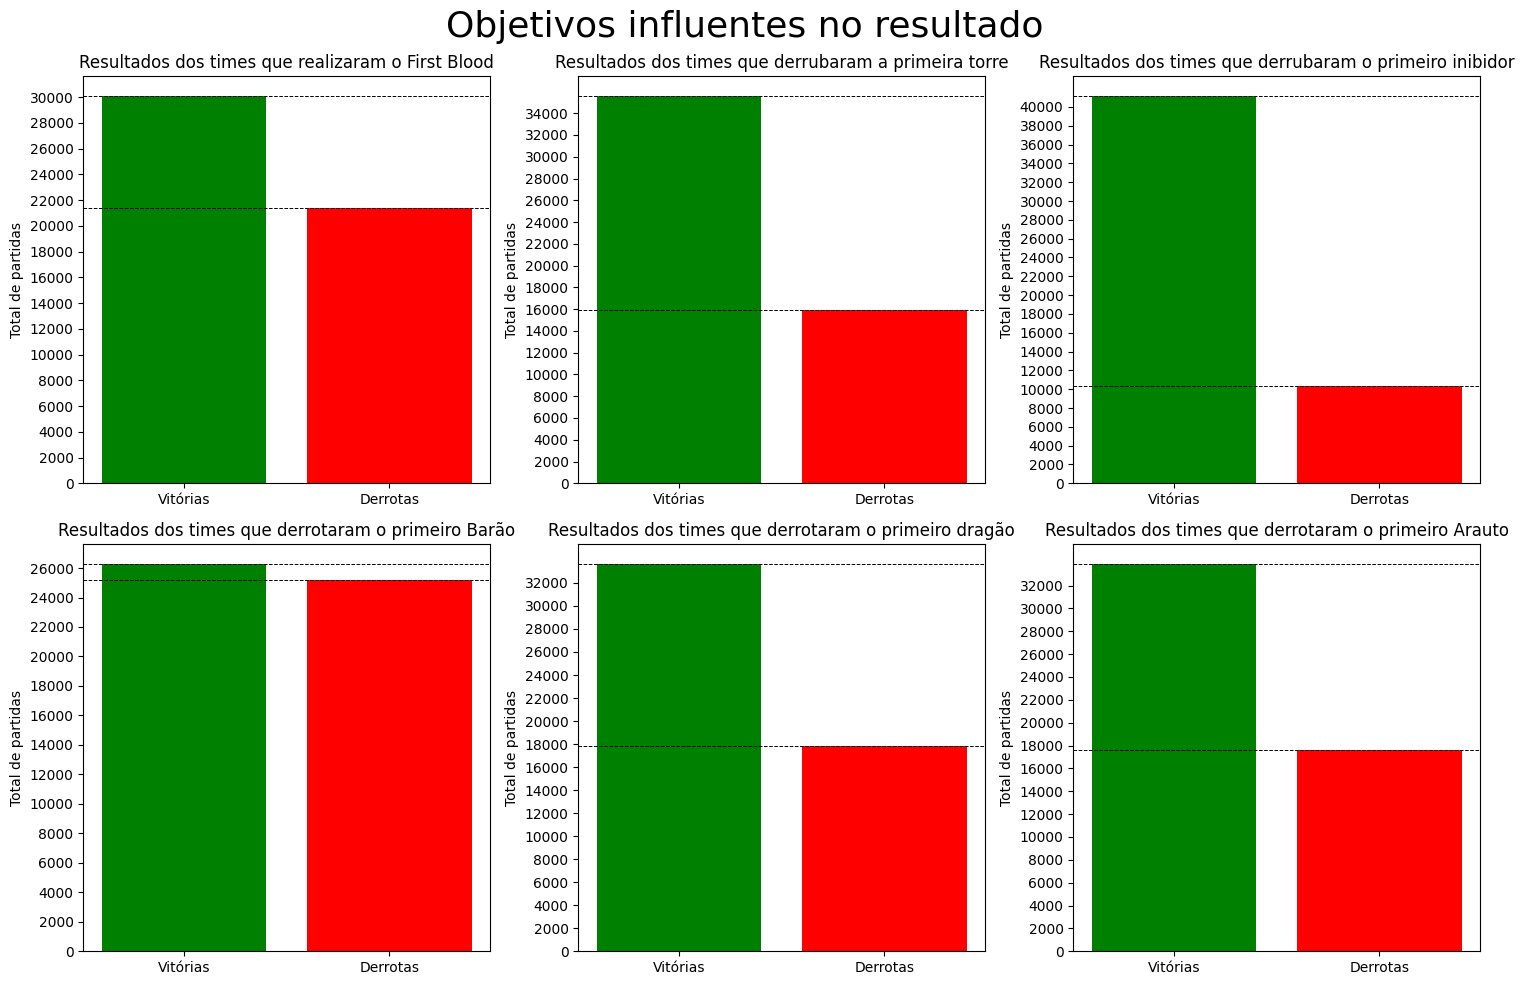

In [23]:
# Cria uma figura
fig, axs = plt.subplots(2, 3, figsize=(15, 10))

# Chama a função para cada subplot
compara_vitorias(axs[0, 0], games, 'firstBlood',      'Resultados dos times que realizaram o First Blood')
compara_vitorias(axs[0, 1], games, 'firstTower',      'Resultados dos times que derrubaram a primeira torre')
compara_vitorias(axs[0, 2], games, 'firstInhibitor',  'Resultados dos times que derrubaram o primeiro inibidor')
compara_vitorias(axs[1, 0], games, 'firstBaron',      'Resultados dos times que derrotaram o primeiro Barão')
compara_vitorias(axs[1, 1], games, 'firstDragon',     'Resultados dos times que derrotaram o primeiro dragão')
compara_vitorias(axs[1, 2], games, 'firstRiftHerald', 'Resultados dos times que derrotaram o primeiro Arauto')

# Coloca o título da imagem
fig.suptitle('Objetivos influentes no resultado', fontsize=26)
# Ajusta os espaçamentos
plt.tight_layout()

plt.show()

## Quantidade de Objetivos Concluídos

In [24]:
def objetivo_x_vitoria(ax, df:pd.DataFrame, column:str, win:1|0, title:str):

  color = 'blue' if win else 'red'

  contagem = np.where(games['winner'] == win, games[f't1{column}'], games[f't2{column}'])
  contagem = pd.Series(contagem).value_counts()

  labels = contagem.index

  ax.bar(labels, contagem, color=color)

  ax.set_xticks(contagem.index)

  for topo in contagem:
      ax.axhline(topo, color='black', linestyle='--', linewidth=0.7)

  ax.set_title(title)
  ax.set_ylabel('Total de partidas')


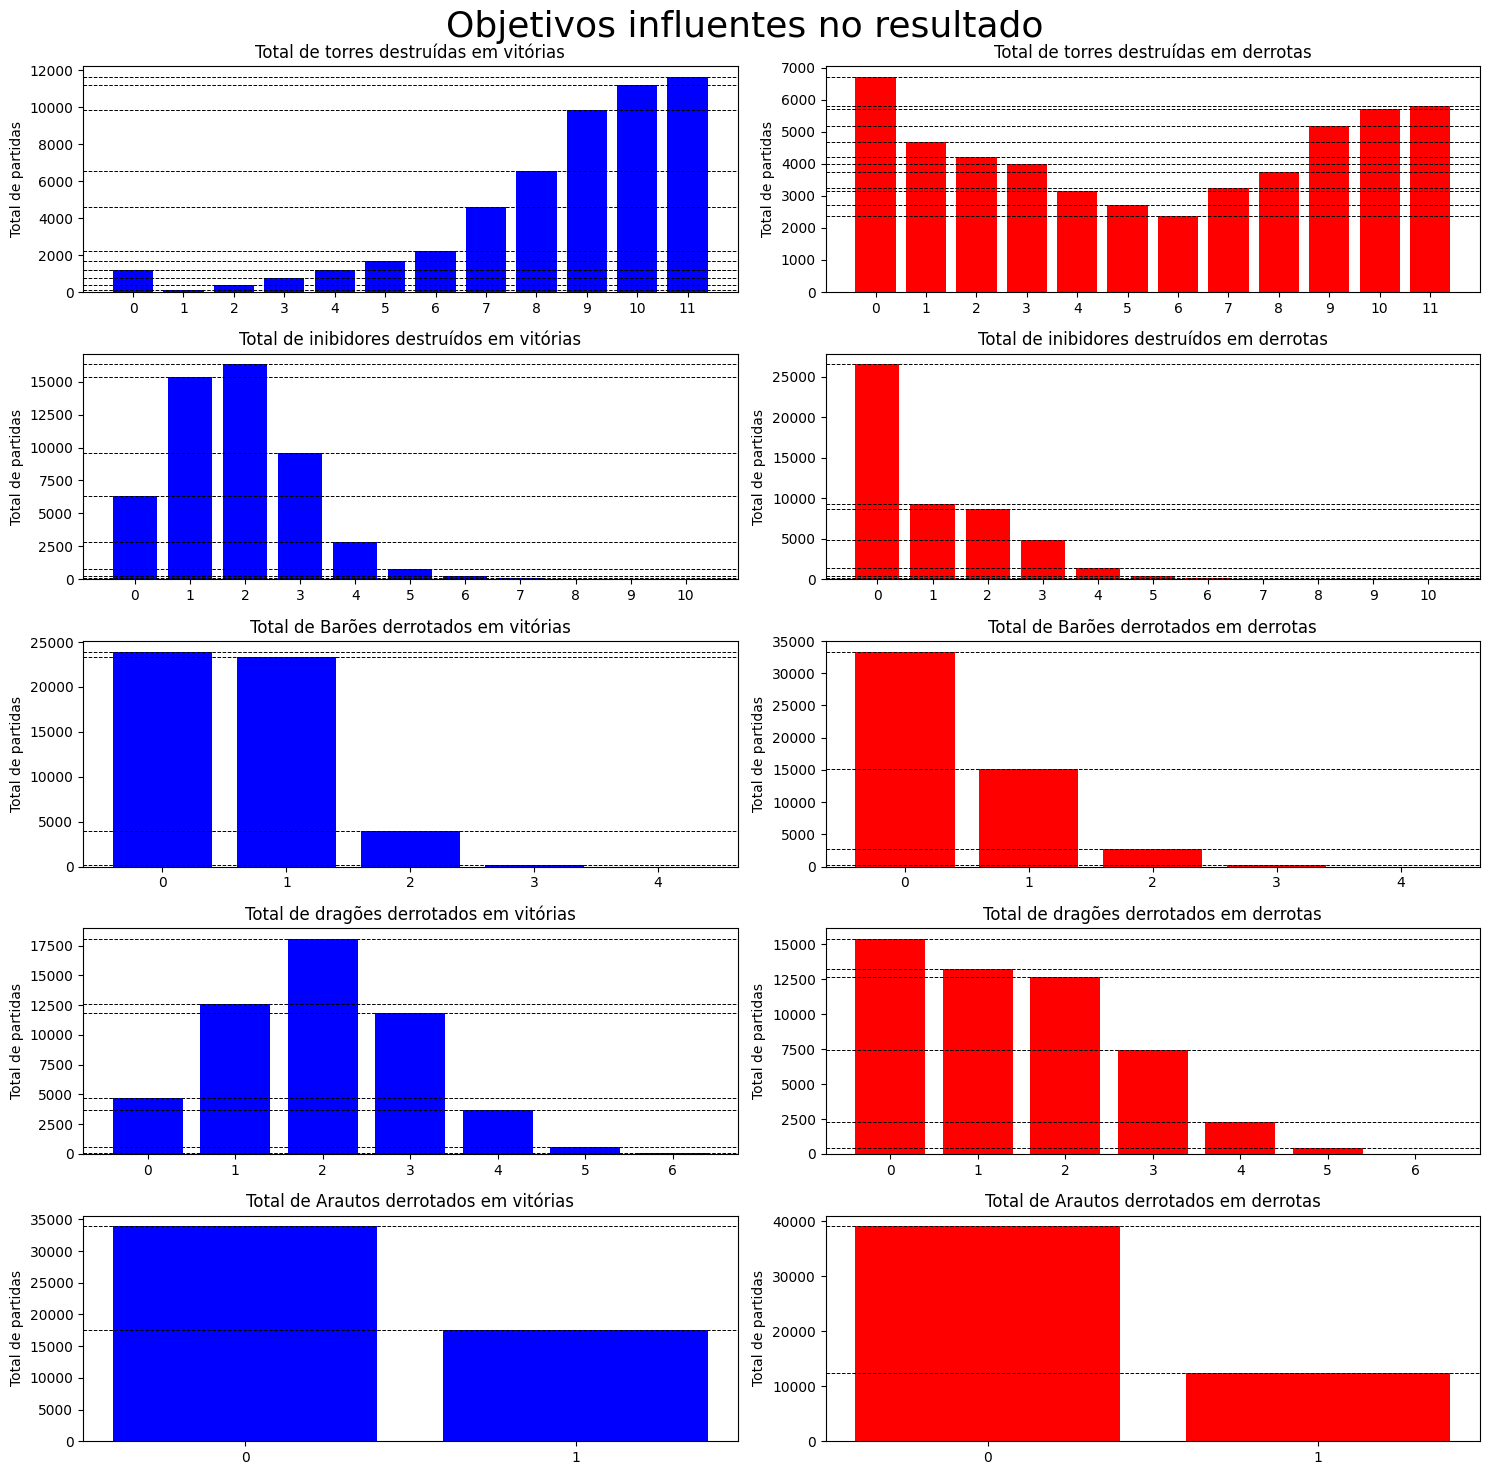

In [25]:
# Cria uma figura
fig, axs = plt.subplots(5, 2, figsize=(15, 15))

# Chama a função para cada subplot
objetivo_x_vitoria(axs[0, 0], games, '_towerKills',      1, 'Total de torres destruídas em vitórias')
objetivo_x_vitoria(axs[1, 0], games, '_inhibitorKills',  1, 'Total de inibidores destruídos em vitórias')
objetivo_x_vitoria(axs[2, 0], games, '_baronKills',      1, 'Total de Barões derrotados em vitórias')
objetivo_x_vitoria(axs[3, 0], games, '_dragonKills',     1, 'Total de dragões derrotados em vitórias')
objetivo_x_vitoria(axs[4, 0], games, '_riftHeraldKills', 1, 'Total de Arautos derrotados em vitórias')

objetivo_x_vitoria(axs[0, 1], games, '_towerKills',      0, 'Total de torres destruídas em derrotas')
objetivo_x_vitoria(axs[1, 1], games, '_inhibitorKills',  0, 'Total de inibidores destruídos em derrotas')
objetivo_x_vitoria(axs[2, 1], games, '_baronKills',      0, 'Total de Barões derrotados em derrotas')
objetivo_x_vitoria(axs[3, 1], games, '_dragonKills',     0, 'Total de dragões derrotados em derrotas')
objetivo_x_vitoria(axs[4, 1], games, '_riftHeraldKills', 0, 'Total de Arautos derrotados em derrotas')

# Coloca o título da imagem
fig.suptitle('Objetivos influentes no resultado', fontsize=26)
# Ajusta os espaçamentos
plt.tight_layout()

plt.show()

## Feitiços de invocador


#### Total de usos de cada Feitiço de Invocador

In [26]:
# Colunas com feitiços de invocador
colunas = ['t1_champ1_sum1', 't1_champ1_sum2', 't1_champ2_sum1', 't1_champ2_sum2',
           't1_champ3_sum1', 't1_champ3_sum2', 't1_champ4_sum1', 't1_champ4_sum2',
           't1_champ5_sum1', 't1_champ5_sum2',
           't2_champ1_sum1', 't2_champ1_sum2', 't2_champ2_sum1', 't2_champ2_sum2',
           't2_champ3_sum1', 't2_champ3_sum2', 't2_champ4_sum1', 't2_champ4_sum2',
           't2_champ5_sum1', 't2_champ5_sum2']


tot_partidas = pd.Series({'Flash':0,
                      'Teleport':0,
                      'Smite':0,
                      'Heal':0,
                      'Ignite':0,
                      'Exhaust':0,
                      'Ghost':0,
                      'Barrier':0,
                      'Cleanse':0})

for coluna in colunas:
  tot_partidas += games[coluna].value_counts()

tot_partidas

Flash       504121
Teleport    109401
Smite       103062
Heal        108043
Ignite       88258
Exhaust      84576
Ghost        14305
Barrier      14880
Cleanse       3154
dtype: int64

#### Vitórias por Feitiço de invocador

In [27]:
colunas = ['tx_champ1_sum1', 'tx_champ1_sum2', 'tx_champ2_sum1', 'tx_champ2_sum2',
           'tx_champ3_sum1', 'tx_champ3_sum2', 'tx_champ4_sum1', 'tx_champ4_sum2',
           'tx_champ5_sum1', 'tx_champ5_sum2']


vitorias = pd.Series({'Flash':0,
                      'Teleport':0,
                      'Smite':0,
                      'Heal':0,
                      'Ignite':0,
                      'Exhaust':0,
                      'Ghost':0,
                      'Barrier':0,
                      'Cleanse':0})

games_1_win = games[games['winner']==1]

cols_1_win = [col.replace('x', '1') for col in colunas]
for coluna in cols_1_win:
  vitorias += games_1_win[coluna].value_counts()


games_2_win = games[games['winner']==2]

cols_2_win = [col.replace('x', '2') for col in colunas]
for coluna in cols_2_win:
  vitorias += games_2_win[coluna].value_counts()

vitorias

Flash       252056
Teleport     54449
Smite        51570
Heal         54015
Ignite       44334
Exhaust      42191
Ghost         7183
Barrier       7550
Cleanse       1552
dtype: int64

In [28]:
porc_vit = vitorias / tot_partidas * 100

porc_vit = porc_vit.sort_values(ascending=False)
porc_vit

Barrier     50.739247
Ignite      50.232274
Ghost       50.213212
Smite       50.037841
Flash       49.999107
Heal        49.993984
Exhaust     49.885310
Teleport    49.770112
Cleanse     49.207356
dtype: float64

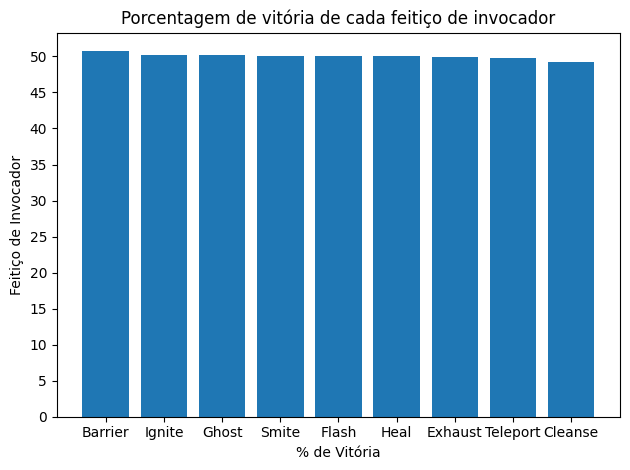

In [29]:
labels = porc_vit.index

plt.bar(labels, porc_vit)

plt.yticks(range(0, 55, 5))

plt.title('Porcentagem de vitória de cada feitiço de invocador')
plt.xlabel('% de Vitória')
plt.ylabel('Feitiço de Invocador')

plt.tight_layout()
plt.show()

In [30]:
# Analisar vitória por campeão

## Escolha de Campeão

In [31]:
# Colunas com feitiços de invocador
colunas = ['t1_champ1id', 't1_champ2id', 't1_champ3id', 't1_champ4id', 't1_champ5id',
           't2_champ1id', 't2_champ2id', 't2_champ3id', 't2_champ4id', 't2_champ5id']


tot_partidas = games[colunas[0]].value_counts()

for coluna in colunas[1:]:
  tot_partidas += games[coluna].value_counts()

tot_partidas = tot_partidas.sort_values(ascending=False)
tot_partidas

Thresh          13002
Tristana        12983
Vayne           10658
Kayn             9853
Lee Sin          9188
                ...  
Ryze             1032
Karthus          1007
Aurelion Sol      841
Aatrox            753
Skarner           574
Name: t1_champ1id, Length: 138, dtype: int64

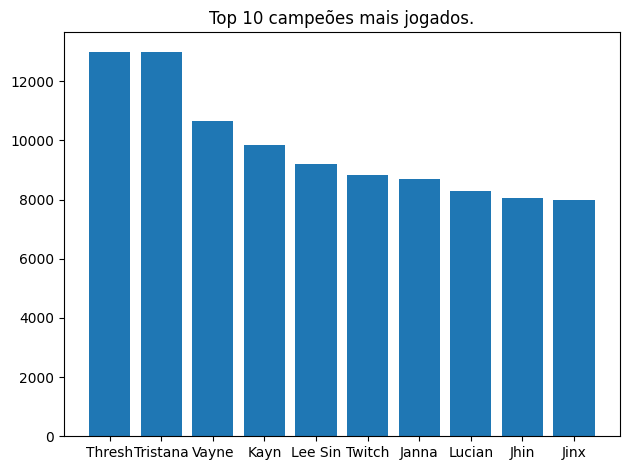

In [32]:
n = 10

plt.bar(tot_partidas.index[:n], tot_partidas[:n])

plt.title(f'Top {n} campeões mais jogados.')
plt.tight_layout()
plt.show()

In [33]:
colunas = ['tx_champ1id', 'tx_champ2id', 'tx_champ3id', 'tx_champ4id', 'tx_champ5id']


games_1_win = games[games['winner']==1]

cols_1_win = [col.replace('x', '1') for col in colunas]
vitorias = games_1_win['t1_champ1id'].value_counts()
for coluna in cols_1_win[1:]:
  vitorias += games_1_win[coluna].value_counts()


games_2_win = games[games['winner']==2]

cols_2_win = [col.replace('x', '2') for col in colunas]
for coluna in cols_2_win:
  vitorias += games_2_win[coluna].value_counts()

vitorias = vitorias.sort_values(ascending=False)
vitorias

Tristana        6713
Thresh          6143
Vayne           5498
Janna           4826
Kayn            4807
                ... 
Ivern            505
Aurelion Sol     442
Ryze             421
Aatrox           354
Skarner          280
Name: t1_champ1id, Length: 138, dtype: int64

In [34]:
porc_vit = vitorias / tot_partidas * 100
porc_vit = porc_vit.sort_values(ascending=False)
porc_vit

Janna     55.528708
Sona      54.190459
Yorick    53.991292
Rammus    53.853854
Anivia    53.596803
            ...    
Poppy     45.174973
Karma     45.149968
Azir      43.359375
Ornn      41.019723
Ryze      40.794574
Name: t1_champ1id, Length: 138, dtype: float64

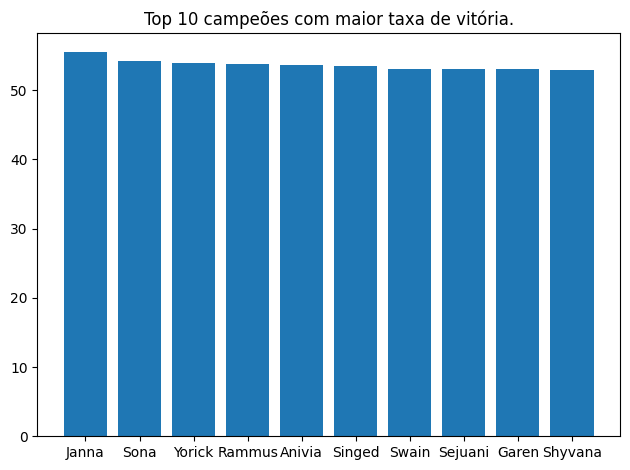

In [35]:
n = 10

plt.bar(porc_vit.index[:n], porc_vit[:n])

plt.title(f'Top {n} campeões com maior taxa de vitória.')
plt.tight_layout()
plt.show()

## Banimento dos Campeões

### Preparação dos Dados

In [37]:
#Criando um dataframe com as vitórias do time 1
df_jogos_w1 = games[games['winner']== 1]

#Criando um df com os jogos que o time 2 foi campeão
df_jogos_w2 = games[games['winner']== 2]

In [38]:
#Criando um dataframe para analisar os campões escolhidos nas vitórias
df_jogos_chw1 =df_jogos_w1[['t1_champ1id','t1_champ2id','t1_champ3id','t1_champ4id','t1_champ5id']]

#Trocando os nomes pelos códigos dos campeões
df_jogos_chw1 = df_jogos_chw1.replace(list(champs['id']),list(champs['name']))
df_jogos_chw1.head(10)

,t1_champ1id,t1_champ2id,t1_champ3id,t1_champ4id,t1_champ5id
0,Vladimir,Bard,Kog'Maw,Master Yi,Viktor
1,Draven,Irelia,Nidalee,Kayle,Shaco
2,Tristana,Kayn,Nami,Rumble,Kassadin
3,Maokai,Brand,Twitch,Orianna,Dr. Mundo
4,Warwick,Twitch,Janna,Draven,Syndra
5,Janna,Kayn,Jax,Veigar,Vayne
6,Heimerdinger,Teemo,Thresh,Tristana,Maokai
7,Gnar,Xayah,Soraka,Malzahar,Gragas
11,Ashe,Twisted Fate,Rammus,Yasuo,Blitzcrank
12,Gragas,Fizz,Garen,Sona,Ashe


In [39]:
#Criando um dataframe para analisar os campeões banidos nas vitórias
df_jogos_banw1=df_jogos_w1[['t1_ban1', 't1_ban2', 't1_ban3','t1_ban4', 't1_ban5']]

#Trocando os nomes pelos códigos dos campeões
df_jogos_banw1 = df_jogos_banw1.replace(list(champs['id']),list(champs['name']))
df_jogos_banw1.head(10)

,t1_ban1,t1_ban2,t1_ban3,t1_ban4,t1_ban5
0,Riven,Janna,Cassiopeia,Draven,Kayn
1,Caitlyn,Darius,Teemo,Xayah,Warwick
2,Lulu,Janna,Twitch,Soraka,Blitzcrank
3,Zed,Vayne,Ornn,Fiora,Cho'Gath
4,Malzahar,Lee Sin,Thresh,Morgana,Cho'Gath
5,Lulu,Urgot,Zed,Darius,Fizz
6,Yasuo,Master Yi,Kayn,Amumu,Shaco
7,Lulu,Warwick,Yasuo,Twitch,Tristana
11,Veigar,Riven,Cho'Gath,Kayn,Draven
12,Yasuo,Lux,Camille,Caitlyn,Kennen


In [40]:
#Criando um df com os campeões picados pelo time 1 em suas derrotadas
df_jogos_chl1 =df_jogos_w2[['t1_champ1id','t1_champ2id','t1_champ3id','t1_champ4id','t1_champ5id']]

#Trocando os nomes pelos códigos dos campeões
df_jogos_chl1 = df_jogos_chl1.replace(list(champs['id']),list(champs['name']))
df_jogos_chl1.head(10)

,t1_champ1id,t1_champ2id,t1_champ3id,t1_champ4id,t1_champ5id
8,Nautilus,Maokai,Tristana,Nami,Vel'Koz
9,Ivern,Master Yi,Nasus,Kalista,Diana
10,Lux,Lucian,Zyra,Maokai,Nautilus
14,Janna,Ahri,Xayah,Riven,Kayn
16,Vayne,Janna,Azir,Xin Zhao,Riven
18,Jinx,Lee Sin,Taric,Ekko,Irelia
19,Rek'Sai,Corki,Jarvan IV,Tristana,Rakan
20,Syndra,Dr. Mundo,Amumu,Leona,Draven
21,Zed,Janna,Gragas,Twitch,Maokai
22,Kog'Maw,Lulu,LeBlanc,Graves,Urgot


In [41]:
#Criando um df com os campeões banidos pelo time 1 em suas derrotadas
df_jogos_banl1 =df_jogos_w2[['t1_ban1', 't1_ban2', 't1_ban3','t1_ban4', 't1_ban5']]

#Trocando os nomes pelos códigos dos campeões
df_jogos_banl1 = df_jogos_banl1.replace(list(champs['id']),list(champs['name']))
df_jogos_banl1.head(10)

,t1_ban1,t1_ban2,t1_ban3,t1_ban4,t1_ban5
8,Zac,Lulu,Cho'Gath,Jayce,Yasuo
9,Cho'Gath,Zed,Kayn,Teemo,Draven
10,Fiora,Janna,Cho'Gath,Vayne,Yasuo
14,Zed,Master Yi,Annie,Darius,Brand
16,Ornn,Darius,Galio,Cho'Gath,Vladimir
18,Malzahar,Vayne,Cho'Gath,LeBlanc,Tristana
19,Vladimir,Twitch,Sejuani,Zac,Cho'Gath
20,Kayn,Urgot,Zac,Yasuo,Cassiopeia
21,Ekko,Gnar,Cho'Gath,Blitzcrank,Galio
22,Twitch,Draven,Orianna,Zed,Caitlyn


In [42]:
#Criando uma df com os campeões mais jogados pelos times 1.
champt1_winner = pd.DataFrame()
for a in df_jogos_chw1.columns:
   champt1_winner[a] = df_jogos_chw1[a].value_counts()

#Criando uma df com os campeões mais jogados pelos times 1 em sua derrotadas
champt1_lose = pd.DataFrame()
for a in df_jogos_chl1.columns:
   champt1_lose[a] = df_jogos_chl1[a].value_counts()


#Criando uma df com os campeões mais banidos pelos times 1 nas vitórias
champt1_ban = pd.DataFrame()
for a in df_jogos_banw1.columns:
   champt1_ban[a] = df_jogos_banw1[a].value_counts()

#Criando uma df com os campeões mais banidos pelos times 1 nas derrotas.
champt1_ban_l = pd.DataFrame()
for a in df_jogos_banl1.columns:
   champt1_ban_l[a] = df_jogos_banl1[a].value_counts()

#Realizando a somatória dos campeõs
champt1_winner_c = champt1_winner.sum(axis=1)
champt1_winner_c = champt1_winner_c.sort_values(ascending=False)

champt1_lose_c = champt1_lose.sum(axis=1)
champt1_lose_c = champt1_lose_c.sort_values(ascending=False)

champt1_banw = champt1_ban.sum(axis=1)
champt1_banw = champt1_banw.sort_values(ascending=False)

champt1_banl = champt1_ban_l.sum(axis=1)
champt1_banl = champt1_banl.sort_values(ascending=False)



In [43]:
#Criando df com informações dos campeões picados pelo time 1
champt1_total = pd.DataFrame()
champt1_total['Vitória'] = champt1_winner_c
champt1_total['Derrota'] = champt1_lose_c
champt1_total['Total'] = champt1_total['Vitória'] + champt1_total['Derrota']
champt1_total['% Vitória'] = round(champt1_total['Vitória']/champt1_total['Total']*100,2)
champt1_total['% Derrota'] = round(champt1_total['Derrota']/champt1_total['Total']*100,2)
champt1_total['Pick rate'] = round(champt1_total['Total']/games.shape[0]*100,2)
champt1_total['Ban Win'] = champt1_banw
champt1_total['Ban lose'] = champt1_banl
champt1_total['Ban Total'] = champt1_total['Ban Win'] + champt1_total['Ban lose']
champt1_total['%Ban Vitória'] = round(champt1_total['Ban Win']/champt1_total['Ban Total']*100,2)
champt1_total['%Ban Derrota'] = round(champt1_total['Ban lose']/champt1_total['Ban Total']*100,2)
champt1_total['Ban rate'] = round(champt1_total['Ban Total']/games.shape[0]*100,2)

#Organizando os valores por ordem de vitórias
champt1_total.sort_values(by = '% Vitória',ascending= False,inplace= True)

#Renomeando o index
champt1_total.rename_axis('Campeões',inplace=True)

#Visualizando so 10 primeiros
champt1_total.head(10)

,Vitória,Derrota,Total,% Vitória,% Derrota,Pick rate,Ban Win,Ban lose,Ban Total,%Ban Vitória,%Ban Derrota,Ban rate
Campeões,,,,,,,,,,,,
Janna,2614,1948,4562,57.30,42.70,8.86,5223,5035,10258,50.92,49.08,19.92
Rammus,829,654,1483,55.90,44.10,2.88,456,493,949,48.05,51.95,1.84
Sona,1452,1165,2617,55.48,44.52,5.08,161,162,323,49.85,50.15,0.63
Yorick,394,324,718,54.87,45.13,1.39,136,115,251,54.18,45.82,0.49
Singed,390,324,714,54.62,45.38,1.39,129,130,259,49.81,50.19,0.50
Garen,1068,895,1963,54.41,45.59,3.81,458,473,931,49.19,50.81,1.81
Xerath,459,385,844,54.38,45.62,1.64,52,51,103,50.49,49.51,0.20
Swain,389,333,722,53.88,46.12,1.40,112,123,235,47.66,52.34,0.46
Malzahar,1000,862,1862,53.71,46.29,3.62,1407,1382,2789,50.45,49.55,5.42


In [44]:
champt1_total.sort_values(by = 'Pick rate',ascending= False).head(10)

,Vitória,Derrota,Total,% Vitória,% Derrota,Pick rate,Ban Win,Ban lose,Ban Total,%Ban Vitória,%Ban Derrota,Ban rate
Campeões,,,,,,,,,,,,
Tristana,3421,3064,6485,52.75,47.25,12.59,3295,3149,6444,51.13,48.87,12.52
Thresh,3078,3387,6465,47.61,52.39,12.56,1521,1458,2979,51.06,48.94,5.79
Vayne,2772,2539,5311,52.19,47.81,10.31,2223,2265,4488,49.53,50.47,8.72
Kayn,2491,2431,4922,50.61,49.39,9.56,4378,4223,8601,50.90,49.10,16.70
Lee Sin,2181,2471,4652,46.88,53.12,9.03,1620,1672,3292,49.21,50.79,6.39
Janna,2614,1948,4562,57.30,42.70,8.86,5223,5035,10258,50.92,49.08,19.92
Twitch,2380,2058,4438,53.63,46.37,8.62,3996,3942,7938,50.34,49.66,15.42
Lucian,1979,2170,4149,47.70,52.30,8.06,325,354,679,47.86,52.14,1.32
Jinx,2109,1992,4101,51.43,48.57,7.96,231,225,456,50.66,49.34,0.89


In [91]:
#Criando tabela da porcentagem de vitórias dos 10 campeões mais escolhidos
champt1_total10 = champt1_total.head(10)


<ipython-input-92-aa74f215b2cc>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  champt1_total10.sort_values(by ='Ban rate', ascending=False,inplace=True)


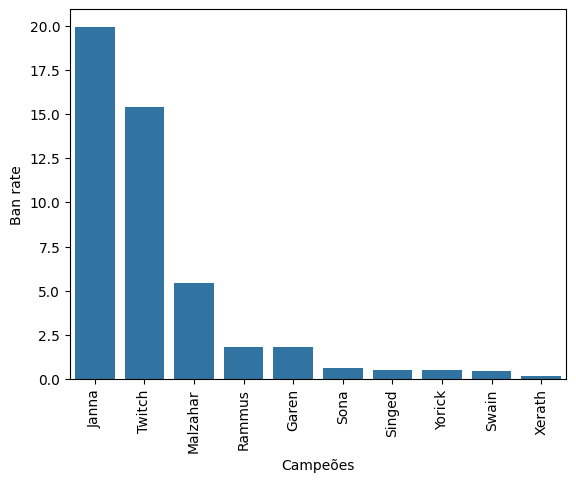

In [92]:
#Analisando visualmente a taxa de ban dos camepões menos jogados
champt1_total10.sort_values(by ='Ban rate', ascending=False,inplace=True)
sns.barplot(champt1_total10,
            x = champt1_total10.index,
            y=champt1_total10['Ban rate'])
plt.xticks(rotation=90)
plt.show()

## Banimentos

In [58]:
#Selecionando colunas a ser analisadas
colunas_play=['t1_champ1id', 't1_champ2id','t1_champ3id','t1_champ4id',
       't1_champ5id', 't2_champ1id','t2_champ2id','t2_champ3id',
       't2_champ4id', 't2_champ5id']
colunas_ban= ['t1_ban1', 't1_ban2', 't1_ban3','t1_ban4', 't1_ban5', 't2_ban1', 't2_ban2', 't2_ban3', 't2_ban4',
       't2_ban5']

In [59]:
df_play_ch = games[colunas_play]
df_play_ch

,t1_champ1id,t1_champ2id,t1_champ3id,t1_champ4id,t1_champ5id,t2_champ1id,t2_champ2id,t2_champ3id,t2_champ4id,t2_champ5id
0,Vladimir,Bard,Kog'Maw,Master Yi,Viktor,Graves,Xayah,Darius,Zed,Thresh
1,Draven,Irelia,Nidalee,Kayle,Shaco,Malphite,Morgana,Hecarim,Yasuo,Riven
2,Tristana,Kayn,Nami,Rumble,Kassadin,Cassiopeia,Thresh,Jayce,Jax,Ashe
3,Maokai,Brand,Twitch,Orianna,Dr. Mundo,Malzahar,Warwick,Thresh,Riven,Ashe
4,Warwick,Twitch,Janna,Draven,Syndra,Sona,Jarvan IV,Kayn,Kassadin,Caitlyn
...,...,...,...,...,...,...,...,...,...,...
51485,Warwick,Kalista,Talon,Bard,Lee Sin,Veigar,Yorick,Vayne,Janna,Gragas
51486,Malzahar,Amumu,Cho'Gath,Thresh,Tristana,Shyvana,Kalista,Leona,Nasus,Veigar
51487,Kayn,Tristana,Bard,Ezreal,Rumble,Annie,Draven,Rammus,Karma,Lux
51488,Kha'Zix,Lucian,Illaoi,Braum,Lux,Miss Fortune,Nocturne,Morgana,Karthus,Master Yi


In [60]:
df_play_ch.replace(list(champs['id']),list(champs['name']),inplace=True)
df_play_ch.head(10)

<ipython-input-60-54ad4c120685>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_play_ch.replace(list(champs['id']),list(champs['name']),inplace=True)


,t1_champ1id,t1_champ2id,t1_champ3id,t1_champ4id,t1_champ5id,t2_champ1id,t2_champ2id,t2_champ3id,t2_champ4id,t2_champ5id
0,Vladimir,Bard,Kog'Maw,Master Yi,Viktor,Graves,Xayah,Darius,Zed,Thresh
1,Draven,Irelia,Nidalee,Kayle,Shaco,Malphite,Morgana,Hecarim,Yasuo,Riven
2,Tristana,Kayn,Nami,Rumble,Kassadin,Cassiopeia,Thresh,Jayce,Jax,Ashe
3,Maokai,Brand,Twitch,Orianna,Dr. Mundo,Malzahar,Warwick,Thresh,Riven,Ashe
4,Warwick,Twitch,Janna,Draven,Syndra,Sona,Jarvan IV,Kayn,Kassadin,Caitlyn
5,Janna,Kayn,Jax,Veigar,Vayne,Riven,Sivir,Ekko,Olaf,Alistar
6,Heimerdinger,Teemo,Thresh,Tristana,Maokai,Blitzcrank,Miss Fortune,Fiora,Vel'Koz,Warwick
7,Gnar,Xayah,Soraka,Malzahar,Gragas,Viktor,Lee Sin,Rakan,Vayne,Maokai
8,Nautilus,Maokai,Tristana,Nami,Vel'Koz,Twitch,Jarvan IV,Lux,Kayn,Brand
9,Ivern,Master Yi,Nasus,Kalista,Diana,Shaco,Varus,Heimerdinger,Lux,Garen


analisando time 2

In [61]:
#Criando um dataframe para analisar os campões escolhidos nas vitórias
df_jogos_chw2 =df_jogos_w2[['t2_champ1id','t2_champ2id','t2_champ3id','t2_champ4id', 't2_champ5id']]
df_jogos_chw2.head(10)

#Trocando os nomes pelos códigos dos campeões
df_jogos_chw2 = df_jogos_chw2.replace(list(champs['id']),list(champs['name']))
df_jogos_chw2.head(10)

,t2_champ1id,t2_champ2id,t2_champ3id,t2_champ4id,t2_champ5id
8,Twitch,Jarvan IV,Lux,Kayn,Brand
9,Shaco,Varus,Heimerdinger,Lux,Garen
10,LeBlanc,Kayle,Fizz,Tristana,Leona
14,Lux,Lee Sin,Syndra,Jax,Twitch
16,Fizz,Sejuani,Jhin,Soraka,Mordekaiser
18,Swain,Teemo,Brand,Jarvan IV,Lucian
19,Draven,Nami,Gangplank,Kha'Zix,Twisted Fate
20,Lulu,Vayne,Graves,Zed,Teemo
21,Diana,Garen,Jhin,Taric,Heimerdinger
22,Tryndamere,Cho'Gath,Jinx,Janna,Twisted Fate


In [62]:
#Criando um dataframe para analisar os campões banidos nas vitórias
df_jogos_banw2=df_jogos_w2[['t2_ban1', 't2_ban2', 't2_ban3', 't2_ban4','t2_ban5']]
df_jogos_banw2.head()

#Trocando os nomes pelos códigos dos campeões
df_jogos_banw2 = df_jogos_banw2.replace(list(champs['id']),list(champs['name']))
df_jogos_banw2.head(10)

,t2_ban1,t2_ban2,t2_ban3,t2_ban4,t2_ban5
8,Evelynn,Caitlyn,Blitzcrank,Yasuo,Janna
9,Lee Sin,Kayn,Akali,Vayne,Blitzcrank
10,Warwick,Heimerdinger,Darius,Jarvan IV,Thresh
14,Cho'Gath,Vayne,Jhin,Blitzcrank,Draven
16,Tristana,Syndra,Blitzcrank,Illaoi,Twitch
18,Cho'Gath,Kayn,Draven,Darius,Zed
19,Lulu,Malphite,Sejuani,Yasuo,Janna
20,Cho'Gath,Nunu,Yasuo,Maokai,Urgot
21,Master Yi,Darius,Kayn,Fiora,Vayne
22,Zac,Orianna,Draven,Sejuani,Maokai


In [63]:
#Criando um df com os campeões picados em suas derrotadas
df_jogos_chl2 =df_jogos_w1[['t2_champ1id','t2_champ2id','t2_champ3id','t2_champ4id', 't2_champ5id']]

#Trocando os nomes pelos códigos dos campeões
df_jogos_chl2 = df_jogos_chl2.replace(list(champs['id']),list(champs['name']))
df_jogos_chl2.head(10)

,t2_champ1id,t2_champ2id,t2_champ3id,t2_champ4id,t2_champ5id
0,Graves,Xayah,Darius,Zed,Thresh
1,Malphite,Morgana,Hecarim,Yasuo,Riven
2,Cassiopeia,Thresh,Jayce,Jax,Ashe
3,Malzahar,Warwick,Thresh,Riven,Ashe
4,Sona,Jarvan IV,Kayn,Kassadin,Caitlyn
5,Riven,Sivir,Ekko,Olaf,Alistar
6,Blitzcrank,Miss Fortune,Fiora,Vel'Koz,Warwick
7,Viktor,Lee Sin,Rakan,Vayne,Maokai
11,Bard,Fiora,Amumu,Xerath,Miss Fortune
12,Sivir,Janna,Zed,Master Yi,Xin Zhao


In [64]:
#Criando um df com os campeões picados em suas derrotadas
df_jogos_banl2 =df_jogos_w1[['t2_ban1', 't2_ban2', 't2_ban3', 't2_ban4','t2_ban5']]

#Trocando os nomes pelos códigos dos campeões
df_jogos_banl2 = df_jogos_banl2.replace(list(champs['id']),list(champs['name']))
df_jogos_banl2.head(10)

,t2_ban1,t2_ban2,t2_ban3,t2_ban4,t2_ban5
0,Fiora,Vayne,Karma,Soraka,Caitlyn
1,Master Yi,Vayne,Zed,Caitlyn,Illaoi
2,Yasuo,Zed,Kha'Zix,Maokai,Evelynn
3,Camille,Tristana,Kayn,Janna,Caitlyn
4,Garen,Master Yi,Braum,Darius,Tristana
5,Draven,Syndra,Zac,Brand,Cho'Gath
6,Nasus,Corki,Cho'Gath,Janna,Kalista
7,Yasuo,Kassadin,Darius,Janna,Zed
11,Ahri,Zac,Thresh,Urgot,Lee Sin
12,Zyra,Lee Sin,Vi,Blitzcrank,Darius


In [65]:
#Criando uma df com os campeões mais banidos pelos times 2 em suas vitórias
champt2_w = pd.DataFrame()
for a in df_jogos_chw2.columns:
   champt2_w[a] = df_jogos_chw2[a].value_counts()
champt2_w.head(10)

#Criando uma df com os campeões mais banidos pelos times 2 em suas vitórias
champt2_banw = pd.DataFrame()
for a in df_jogos_banw2.columns:
   champt2_banw[a] = df_jogos_banw2[a].value_counts()
champt2_banw.head(10)

#Criando uma df com os campeões mais jogados pelos times 2 em sua derrotadas
champt2_lose = pd.DataFrame()
for a in df_jogos_chl2.columns:
   champt2_lose[a] = df_jogos_chl2[a].value_counts()
champt2_lose.head(10)

#Criando uma df com os campeões mais banidos pelos times 2 em sua derrotadas
champt2_banlose = pd.DataFrame()
for a in df_jogos_banl2.columns:
   champt2_banlose[a] = df_jogos_banl2[a].value_counts()
champt2_banlose.head(10)

#Realizando a somatória dos campeões nos df
champt2_banlose_s = champt2_banlose.sum(axis=1)
champt2_banlose_s = champt2_banlose_s.sort_values(ascending=False)

champt2_lose_s = champt2_lose.sum(axis=1)
champt2_lose_s = champt2_lose_s.sort_values(ascending=False)

champt2_banw_s = champt2_banw.sum(axis=1)
champt2_banw_s = champt2_banw_s.sort_values(ascending=False)

champt2_w_s = champt2_w.sum(axis=1)
champt2_w_s = champt2_w_s.sort_values(ascending=False)

In [66]:
#Criando df com informações dos campeões picados pelo time 2
champt2_total = pd.DataFrame()
champt2_total['Vitória'] = champt2_w_s
champt2_total['Derrota'] = champt2_lose_s
champt2_total['Total'] = champt2_total['Vitória'] + champt2_total['Derrota']
champt2_total['% Vitória'] = round(champt2_total['Vitória']/champt2_total['Total']*100,2)
champt2_total['% Derrota'] = round(champt2_total['Derrota']/champt2_total['Total']*100,2)
champt2_total['Pick rate'] = round(champt2_total['Total']/games.shape[0]*100,2)
champt2_total['Ban Win'] = champt2_banw_s
champt2_total['Ban lose'] = champt2_banlose_s
champt2_total['Ban Total'] = champt2_total['Ban Win'] + champt2_total['Ban lose']
champt2_total['%Ban Vitória'] = round(champt2_total['Ban Win']/champt2_total['Ban Total']*100,2)
champt2_total['%Ban Derrota'] = round(champt2_total['Ban lose']/champt2_total['Ban Total']*100,2)
champt2_total['Ban rate'] = round(champt2_total['Ban Total']/games.shape[0]*100,2)

#Organizando os valores por ordem de vitórias
champt2_total.sort_values(by = '% Vitória',ascending= False,inplace= True)

#Renomeando o index
champt2_total.rename_axis('Campeões',inplace=True)

#Visualizando so 10 primeiros
champt2_total.head(10)

,Vitória,Derrota,Total,% Vitória,% Derrota,Pick rate,Ban Win,Ban lose,Ban Total,%Ban Vitória,%Ban Derrota,Ban rate
Campeões,,,,,,,,,,,,
Anivia,617,516,1133,54.46,45.54,2.20,249.0,200,449.0,55.46,44.54,0.87
Aurelion Sol,238,200,438,54.34,45.66,0.85,118.0,111,229.0,51.53,48.47,0.44
Janna,2212,1917,4129,53.57,46.43,8.02,5700.0,5432,11132.0,51.20,48.80,21.62
Soraka,1646,1427,3073,53.56,46.44,5.97,1184.0,1214,2398.0,49.37,50.63,4.66
Wukong,582,511,1093,53.25,46.75,2.12,88.0,107,195.0,45.13,54.87,0.38
Sejuani,1024,907,1931,53.03,46.97,3.75,1343.0,1319,2662.0,50.45,49.55,5.17
Yorick,350,310,660,53.03,46.97,1.28,140.0,114,254.0,55.12,44.88,0.49
Sona,1490,1322,2812,52.99,47.01,5.46,147.0,143,290.0,50.69,49.31,0.56
Tryndamere,1073,958,2031,52.83,47.17,3.94,1421.0,1454,2875.0,49.43,50.57,5.58


In [67]:
champt2_total

,Vitória,Derrota,Total,% Vitória,% Derrota,Pick rate,Ban Win,Ban lose,Ban Total,%Ban Vitória,%Ban Derrota,Ban rate
Campeões,,,,,,,,,,,,
Anivia,617,516,1133,54.46,45.54,2.20,249.0,200,449.0,55.46,44.54,0.87
Aurelion Sol,238,200,438,54.34,45.66,0.85,118.0,111,229.0,51.53,48.47,0.44
Janna,2212,1917,4129,53.57,46.43,8.02,5700.0,5432,11132.0,51.20,48.80,21.62
Soraka,1646,1427,3073,53.56,46.44,5.97,1184.0,1214,2398.0,49.37,50.63,4.66
Wukong,582,511,1093,53.25,46.75,2.12,88.0,107,195.0,45.13,54.87,0.38
...,...,...,...,...,...,...,...,...,...,...,...,...
Lee Sin,2036,2500,4536,44.89,55.11,8.81,1542.0,1682,3224.0,47.83,52.17,6.26
Karma,675,892,1567,43.08,56.92,3.04,45.0,56,101.0,44.55,55.45,0.20
Azir,277,375,652,42.48,57.52,1.27,95.0,107,202.0,47.03,52.97,0.39


todos os jogos

In [79]:
champgeral = pd.DataFrame()
champgeral['Vitória'] = champt2_total['Vitória'] + champt1_total['Vitória']
champgeral['Derrota'] = champt2_total['Derrota'] + champt1_total['Derrota']
champgeral['Total'] = champgeral['Vitória'] + champgeral['Derrota']
champgeral['% Vitória'] = round(champgeral['Vitória']/champgeral['Total']*100,2)
champgeral['% Derrota'] = round(champgeral['Derrota']/champgeral['Total']*100,2)
champgeral['Pick rate'] = round(champgeral['Total']/games.shape[0]*100,2)
champgeral['Ban Total'] = champt1_total['Ban Total'] + champt2_total['Ban Total']
champgeral['Ban rate'] = round(champt2_total['Ban Total']/games.shape[0]*100,2)
champgeral['% Part. dos Games'] = round(
    (champgeral['Total']+champgeral['Ban Total'])/games.shape[0]*100,
    2)
champgeral
champgeral


#Organizando os valores por ordem de vitórias
champgeral.sort_values(by = '% Vitória',ascending= False,inplace= True)
champgeral


,Vitória,Derrota,Total,% Vitória,% Derrota,Pick rate,Ban Total,Ban rate,% Part. dos Games
Campeões,,,,,,,,,
Janna,4826,3865,8691,55.53,44.47,16.88,21390.0,21.62,58.42
Sona,2942,2487,5429,54.19,45.81,10.54,613.0,0.56,11.73
Yorick,744,634,1378,53.99,46.01,2.68,505.0,0.49,3.66
Rammus,1614,1383,2997,53.85,46.15,5.82,1846.0,1.74,9.41
Anivia,1207,1045,2252,53.60,46.40,4.37,877.0,0.87,6.08
...,...,...,...,...,...,...,...,...,...
Poppy,852,1034,1886,45.17,54.83,3.66,161.0,0.18,3.98
Karma,1415,1719,3134,45.15,54.85,6.09,215.0,0.20,6.50
Azir,555,725,1280,43.36,56.64,2.49,419.0,0.39,3.30


In [80]:
champgeral_sorted = champgeral.sort_values('% Vitória', ascending=False)
champgeral_sorted

,Vitória,Derrota,Total,% Vitória,% Derrota,Pick rate,Ban Total,Ban rate,% Part. dos Games
Campeões,,,,,,,,,
Janna,4826,3865,8691,55.53,44.47,16.88,21390.0,21.62,58.42
Sona,2942,2487,5429,54.19,45.81,10.54,613.0,0.56,11.73
Yorick,744,634,1378,53.99,46.01,2.68,505.0,0.49,3.66
Rammus,1614,1383,2997,53.85,46.15,5.82,1846.0,1.74,9.41
Anivia,1207,1045,2252,53.60,46.40,4.37,877.0,0.87,6.08
...,...,...,...,...,...,...,...,...,...
Poppy,852,1034,1886,45.17,54.83,3.66,161.0,0.18,3.98
Karma,1415,1719,3134,45.15,54.85,6.09,215.0,0.20,6.50
Azir,555,725,1280,43.36,56.64,2.49,419.0,0.39,3.30


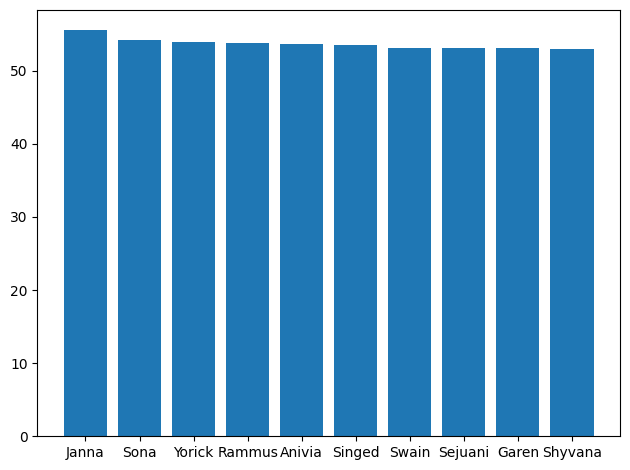

In [81]:
plt.bar(champgeral_sorted.index[:10], champgeral_sorted['% Vitória'][:10])

plt.tight_layout()

plt.show()

Observado que  existem campeões com uma alta taxa de vitória porém com um baixo pick rate, pode-se considerar que os mesmo são de jogadores "mono-champion", que maximizam as habilidades com os camepões. Os mesmo podem ser considerados estatisticamente como "outliers", por isso serão eliminados.

<Axes: xlabel='Pick rate'>

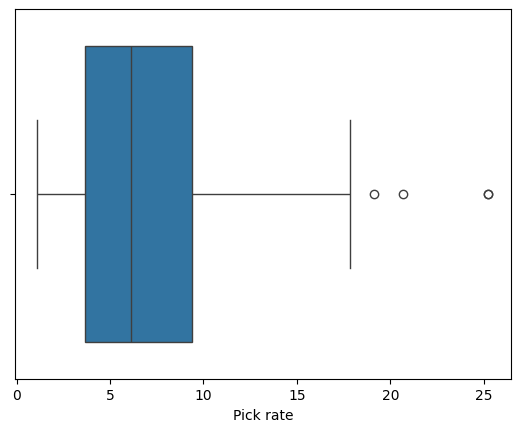

In [82]:

sns.boxplot(x=champgeral['Pick rate'])
# Analisando visualmente o boxplot pode-se considerar que o Q1 está entre 0 e 5%.

In [83]:
#Utilizando a função describe para descobrir Q1.
champgeral['Pick rate'].describe()

count    138.000000
mean       7.246667
std        4.764329
min        1.110000
25%        3.660000
50%        6.115000
75%        9.402500
max       25.250000
Name: Pick rate, dtype: float64

In [84]:
#Encontrado que Q1 é igual a 3.66%, iremos eliminar esses campeões para uma maior limpeza dos dados.
champgeral_acimadeQ1 = champgeral[champgeral['Pick rate'] > 3.66]

In [85]:
champgeral_acimadeQ1.head(15)

,Vitória,Derrota,Total,% Vitória,% Derrota,Pick rate,Ban Total,Ban rate,% Part. dos Games
Campeões,,,,,,,,,
Janna,4826,3865,8691,55.53,44.47,16.88,21390.0,21.62,58.42
Sona,2942,2487,5429,54.19,45.81,10.54,613.0,0.56,11.73
Rammus,1614,1383,2997,53.85,46.15,5.82,1846.0,1.74,9.41
Anivia,1207,1045,2252,53.60,46.40,4.37,877.0,0.87,6.08
Sejuani,2054,1813,3867,53.12,46.88,7.51,5231.0,5.17,17.67
Garen,2067,1826,3893,53.10,46.90,7.56,1869.0,1.82,11.19
Shyvana,1296,1149,2445,53.01,46.99,4.75,387.0,0.35,5.50
Malzahar,1986,1766,3752,52.93,47.07,7.29,5480.0,5.23,17.93
Tryndamere,2159,1924,4083,52.88,47.12,7.93,5891.0,5.58,19.37


Verifincando a influência da retirada dos 'outliers' nas participações dos games.

In [86]:
#Analisando a % de part. dos games pré retirada
champgeral['% Part. dos Games'].describe()

count    138.000000
mean      14.438696
std       14.596242
min        1.250000
25%        4.682500
50%        9.315000
75%       17.827500
max       79.410000
Name: % Part. dos Games, dtype: float64

<Axes: xlabel='% Part. dos Games'>

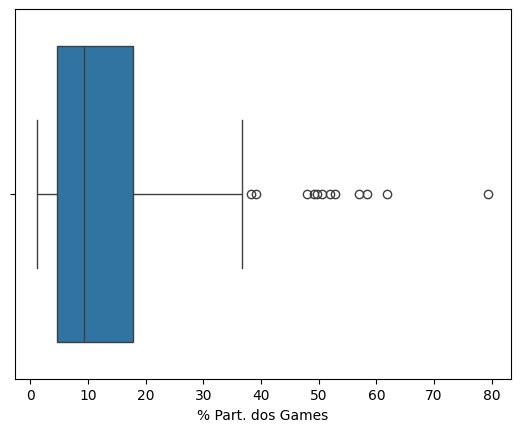

In [87]:
sns.boxplot(x=champgeral['% Part. dos Games'])

In [88]:
#Analisando a % de Part dos games após retirada
champgeral_acimadeQ1['% Part. dos Games'].describe()

count    102.000000
mean      18.217745
std       15.263448
min        4.260000
25%        8.145000
50%       12.495000
75%       20.812500
max       79.410000
Name: % Part. dos Games, dtype: float64

<Axes: xlabel='% Part. dos Games'>

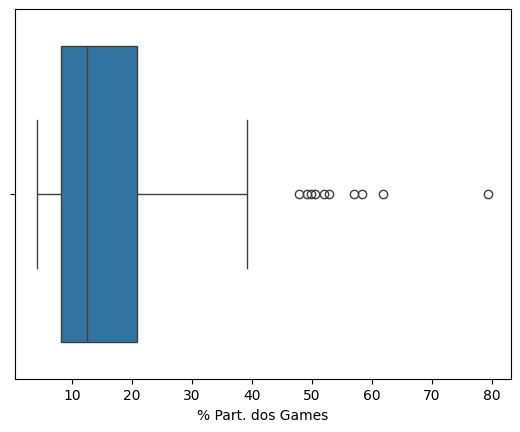

In [89]:
sns.boxplot(x=champgeral_acimadeQ1['% Part. dos Games'])

1 - Verificado que a retirada dos "monochampions", refletiu na mudança de Q1 e o min da %Part dos games de maneira coerente.
2 - Avaliado a presença de um outlier no limite superior, existe a necessidade verificar o mesmo e ver se deve ser retirado ou não.

In [90]:
champgeral_acimadeQ1[champgeral_acimadeQ1['% Part. dos Games'] > 70]

,Vitória,Derrota,Total,% Vitória,% Derrota,Pick rate,Ban Total,Ban rate,% Part. dos Games
Campeões,,,,,,,,,
Yasuo,3948,3924,7872,50.15,49.85,15.29,33015.0,31.85,79.41


Identificado que o campeão é o Yasuo, que têm um alto indice de ban devido ao baixo desempenho nas mãos do jogadores, principalmente em elos mais baixo.
Devido a isso o mesmo não deve ser retirado